### Análise de logs

### Instalação biblioteca Pandas

In [1]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------- ----------------------------- 3.4/12.6 MB 18.8 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.6 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 19.9 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [2]:
import pandas as pd

### Coletar os dados

DF = Data frame, veriricar qual operador separa os dados na csv (virgula ou ponto e virgula)

In [7]:
df = pd.read_csv('logs_seguranca.csv', sep=';')

#### Primeira análise dos dados
Verificar se há dados faltantes ou dados duplicados

In [10]:
df.head()

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,attack_type,user,status,error_message,geo_location,session_hash
0,2024-09-22T20:16:15,98.117.139.140,163.251.95.68,NaN,NaN,ICMP,Port Scanning,root,Falhou,Invalid Password,"São Paulo, Brasil",16991049
1,2024-03-12T13:33:55,132.95.60.13,82.123.249.140,69.0,161.0,UDP,DDoS,guest,Falhou,Access Denied,"Tokyo, Japão",17ec86a
2,2024-05-20T22:09:25,145.16.29.161,240.202.154.245,68.0,53.0,UDP,Exploração de Vulnerabilidade,root,Sucesso,NaN,"New York, USA",1c64a94
3,2024-01-23T20:04:20,148.80.10.227,127.63.234.153,NaN,NaN,ICMP,Port Scanning,root,Sucesso,NaN,"São Paulo, Brasil",21f7d2b
4,2024-02-18T06:11:12,19.246.254.219,176.70.17.95,67.0,161.0,UDP,Exploração de Vulnerabilidade,admin,Falhou,Rate Limit Exceeded,"Berlin, Alemanha",7351e29


#### Verificar dados duplicados

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.drop_duplicates()

#### Verificar dados ausentes
Filtrar por registros com filtros

In [13]:
df.isna().sum()

timestamp          0
src_ip             0
dst_ip             0
src_port         337
dst_port         337
protocol           0
attack_type        0
user               0
status             0
error_message    493
geo_location       0
session_hash       0
dtype: int64

In [14]:
filtro = df['src_port'].isna()
df[filtro]

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,attack_type,user,status,error_message,geo_location,session_hash
0,2024-09-22T20:16:15,98.117.139.140,163.251.95.68,NaN,NaN,ICMP,Port Scanning,root,Falhou,Invalid Password,"São Paulo, Brasil",16991049
3,2024-01-23T20:04:20,148.80.10.227,127.63.234.153,NaN,NaN,ICMP,Port Scanning,root,Sucesso,NaN,"São Paulo, Brasil",21f7d2b
10,2024-06-01T10:03:50,176.217.97.70,32.225.248.93,NaN,NaN,ICMP,DDoS,admin,Falhou,Rate Limit Exceeded,"Berlin, Alemanha",2286de4
15,2024-09-02T22:18:19,169.240.88.9,12.5.200.241,NaN,NaN,ICMP,Port Scanning,root,Falhou,Rate Limit Exceeded,"Paris, França",b6a8e6
17,2024-09-16T05:18:00,239.161.51.255,65.127.97.107,NaN,NaN,ICMP,DDoS,root,Falhou,403 Forbidden,"New York, USA",19d3d52
...,...,...,...,...,...,...,...,...,...,...,...,...
983,2024-03-23T21:35:07,59.189.129.178,46.254.187.255,NaN,NaN,ICMP,DDoS,root,Falhou,Invalid Password,"Berlin, Alemanha",1372155f
984,2024-06-05T06:20:24,8.99.60.196,217.73.17.188,NaN,NaN,ICMP,Port Scanning,admin,Falhou,Invalid Password,"New York, USA",2002240a
989,2024-01-10T04:37:52,94.174.2.50,1.207.1.72,NaN,NaN,ICMP,Port Scanning,root,Sucesso,NaN,"São Paulo, Brasil",19fe201e
990,2024-01-25T01:44:50,95.101.57.131,128.194.74.202,NaN,NaN,ICMP,Port Scanning,root,Falhou,Rate Limit Exceeded,"Berlin, Alemanha",f701b90


In [15]:
df['src_ip'].value_counts()

src_ip
148.80.10.227     4
16.182.203.140    1
254.253.156.26    1
8.99.60.196       1
59.189.129.178    1
                 ..
124.163.25.3      1
2.237.128.138     1
27.240.190.227    1
230.200.28.186    1
140.126.247.80    1
Name: count, Length: 997, dtype: int64

In [18]:
df['src_ip'].value_counts(normalize=True) * 100

src_ip
148.80.10.227     0.4
16.182.203.140    0.1
254.253.156.26    0.1
8.99.60.196       0.1
59.189.129.178    0.1
                 ... 
124.163.25.3      0.1
2.237.128.138     0.1
27.240.190.227    0.1
230.200.28.186    0.1
140.126.247.80    0.1
Name: proportion, Length: 997, dtype: float64

In [16]:
df.shape

(1000, 12)

#### Informações gerais

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1000 non-null   object 
 1   src_ip         1000 non-null   object 
 2   dst_ip         1000 non-null   object 
 3   src_port       663 non-null    float64
 4   dst_port       663 non-null    float64
 5   protocol       1000 non-null   object 
 6   attack_type    1000 non-null   object 
 7   user           1000 non-null   object 
 8   status         1000 non-null   object 
 9   error_message  507 non-null    object 
 10  geo_location   1000 non-null   object 
 11  session_hash   1000 non-null   object 
dtypes: float64(2), object(10)
memory usage: 93.9+ KB


#### Transformação de dados
Transformando timestamp (objeto) em data

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      1000 non-null   datetime64[ns]
 1   src_ip         1000 non-null   object        
 2   dst_ip         1000 non-null   object        
 3   src_port       663 non-null    float64       
 4   dst_port       663 non-null    float64       
 5   protocol       1000 non-null   object        
 6   attack_type    1000 non-null   object        
 7   user           1000 non-null   object        
 8   status         1000 non-null   object        
 9   error_message  507 non-null    object        
 10  geo_location   1000 non-null   object        
 11  session_hash   1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 93.9+ KB


Mostrar numeros de ataque por horas baseado no timestamp

In [24]:
df['timestamp'].dt.hour.value_counts().sort_values(ascending=False)

timestamp
23    109
22     85
21     71
16     47
7      44
4      44
6      43
2      42
19     41
20     40
0      40
3      40
10     39
1      39
5      38
8      38
17     37
15     36
12     36
9      27
18     23
14     15
13     14
11     12
Name: count, dtype: int64

Mostrar numeros de ataques por mes

In [25]:
df['timestamp'].dt.month.value_counts().sort_values(ascending=False)

timestamp
2     114
5     114
1     110
6     109
10    102
8      99
9      94
3      92
4      89
7      77
Name: count, dtype: int64

Criando nova coluna para categorizar o mes do ataque

In [26]:
df['mes_ataque'] = df['timestamp'].dt.month

In [27]:
df.head()

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,attack_type,user,status,error_message,geo_location,session_hash,mes_ataque
0,2024-09-22 20:16:15,98.117.139.140,163.251.95.68,NaN,NaN,ICMP,Port Scanning,root,Falhou,Invalid Password,"São Paulo, Brasil",16991049,9
1,2024-03-12 13:33:55,132.95.60.13,82.123.249.140,69.0,161.0,UDP,DDoS,guest,Falhou,Access Denied,"Tokyo, Japão",17ec86a,3
2,2024-05-20 22:09:25,145.16.29.161,240.202.154.245,68.0,53.0,UDP,Exploração de Vulnerabilidade,root,Sucesso,NaN,"New York, USA",1c64a94,5
3,2024-01-23 20:04:20,148.80.10.227,127.63.234.153,NaN,NaN,ICMP,Port Scanning,root,Sucesso,NaN,"São Paulo, Brasil",21f7d2b,1
4,2024-02-18 06:11:12,19.246.254.219,176.70.17.95,67.0,161.0,UDP,Exploração de Vulnerabilidade,admin,Falhou,Rate Limit Exceeded,"Berlin, Alemanha",7351e29,2


Identificando os tipos de ataques

In [28]:
df['attack_type'].unique()

array(['Port Scanning', 'DDoS', 'Exploração de Vulnerabilidade',
       'Brute Force'], dtype=object)

Ocorrencias nos tipos de ataques

In [29]:
df['attack_type'].value_counts()

attack_type
DDoS                             328
Exploração de Vulnerabilidade    298
Brute Force                      194
Port Scanning                    180
Name: count, dtype: int64

Procentagem de tipos de ataques

In [30]:
df['attack_type'].value_counts(normalize=True) * 100

attack_type
DDoS                             32.8
Exploração de Vulnerabilidade    29.8
Brute Force                      19.4
Port Scanning                    18.0
Name: proportion, dtype: float64

In [35]:
filtro = df['attack_type'] == 'Brute Force'
df[filtro].groupby('geo_location').count()

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,attack_type,user,status,error_message,session_hash,mes_ataque
geo_location,,,,,,,,,,,,
"Berlin, Alemanha",47,47,47,47,47,47,47,47,47,27,47,47
"New York, USA",38,38,38,38,38,38,38,38,38,15,38,38
"Paris, França",33,33,33,33,33,33,33,33,33,14,33,33
"São Paulo, Brasil",36,36,36,36,36,36,36,36,36,14,36,36
"Tokyo, Japão",40,40,40,40,40,40,40,40,40,20,40,40


In [36]:
filtro = df['attack_type'] == 'Brute Force'
df[filtro].groupby('geo_location')['geo_location'].count()

geo_location
Berlin, Alemanha     47
New York, USA        38
Paris, França        33
São Paulo, Brasil    36
Tokyo, Japão         40
Name: geo_location, dtype: int64

In [38]:
filtro = df['attack_type'] == 'Brute Force'
df[filtro].groupby('mes_ataque')['mes_ataque'].count().sort_values(ascending=False)

mes_ataque
1     28
3     25
8     23
5     23
2     21
6     18
10    16
4     15
7     13
9     12
Name: mes_ataque, dtype: int64

In [39]:
df[filtro].groupby(['protocol','mes_ataque'])['mes_ataque'].count()

protocol  mes_ataque
TCP       1             28
          2             21
          3             25
          4             15
          5             23
          6             18
          7             13
          8             23
          9             12
          10            16
Name: mes_ataque, dtype: int64

In [40]:
df[filtro].groupby(['protocol','attack_type'])['mes_ataque'].count()

protocol  attack_type
TCP       Brute Force    194
Name: mes_ataque, dtype: int64

### Extra
#### Analise de gráficos

In [41]:
!pip install seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 18.5 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 20.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 14.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 20.1 MB/s eta 0:00:00


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

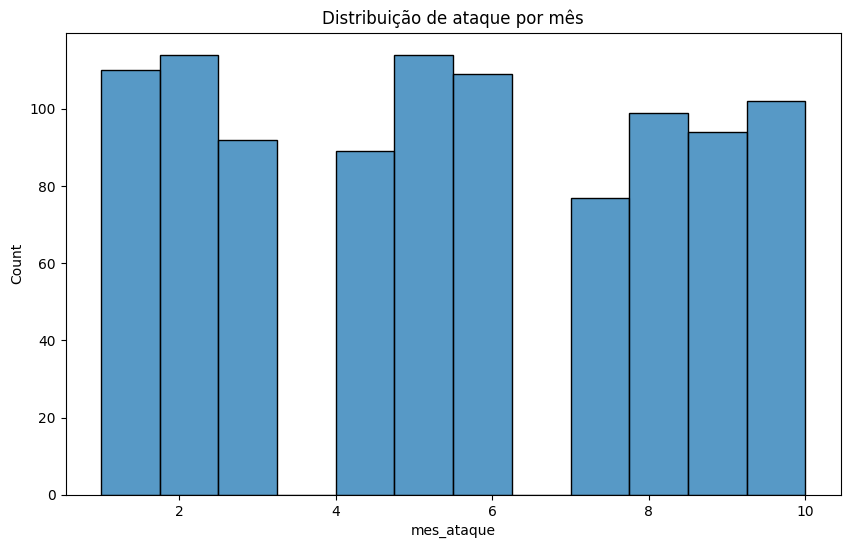

In [ ]:
plt.figure(figsize=(10,6))

plt.title('Distribuição de ataque por mês')
sns.histplot(data=df, x='mes_ataque', bins=12)
plt.savefig('histograma')